In [10]:
!pip install pydot

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar datos


from google.colab import drive
drive.mount('/content/drive')


data = pd.read_csv('/content/drive/MyDrive/dataset_sensores_emociones.csv')

print(data.head(10))

# Preprocesamiento
# Convertir variables categóricas a numéricas
label_encoder = LabelEncoder()
data['Género'] = label_encoder.fit_transform(data['Género'])
data['Provincia'] = label_encoder.fit_transform(data['Provincia'])
data['Temporada'] = label_encoder.fit_transform(data['Temporada'])
data['Emoción'] = label_encoder.fit_transform(data['Emoción'])

# Separar características y etiquetas
X = data[['Edad', 'Género', 'Provincia', 'Semestre', 'Temporada',
          'Presión_Arterial', 'Pulso_Cardiaco', 'Sudoración']].values
y = to_categorical(data['Emoción'].values)  # Etiquetas en formato categórico

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ID_Matricula  Edad Género   Provincia  Semestre                 Temporada  \
0          1000    22      M  Esmeraldas         4          Inicio de Clases   
1          1000    22      M  Esmeraldas         4     Temporada de Exámenes   
2          1000    22      M  Esmeraldas         4  Finalización de Semestre   
3          1001    19      F      Carchi         2          Inicio de Clases   
4          1001    19      F      Carchi         2     Temporada de Exámenes   
5          1001    19      F      Carchi         2  Finalización de Semestre   
6          1002    22      F   Pichincha         1          Inicio de Clases   
7          1002    22      F   Pichincha         1     Temporada de Exámenes   
8          1002    22      F   Pichincha         1  Finalización de Semestre   
9          1003    21      F      Carchi         7          Inicio de C

In [12]:
import pandas as pd

# Crear diccionarios para mapear las etiquetas
provincia_map = {0: "Carchi", 1: "Esmeraldas", 2: "Imbabura", 3: "Pichincha"}  # Reemplaza con los nombres reales
temporada_map = {0: "Inicio de Clases", 1: "Temporada de Exámenes", 2: "Finalización de Semestre"}
emocion_map = {0: "Happy", 1: "Sad", 2: "Angry", 3: "Surprise", 4: "Fear"}  # Ajusta según tus emociones
genero_map = {0: "Masculino", 1: "Femenino"}

# Aplicar el mapeo a cada columna categórica
data['Provincia'] = data['Provincia'].map(provincia_map)
data['Temporada'] = data['Temporada'].map(temporada_map)
data['Emoción'] = data['Emoción'].map(emocion_map)
data['Género'] = data['Género'].map(genero_map)

# Mostrar la clasificación con las etiquetas mapeadas

# Clasificación por Provincia
print("Clasificación por Provincia:")
provincia_counts = data['Provincia'].value_counts()
for provincia, count in provincia_counts.items():
    print(f"{provincia}: {count}")

# Clasificación por Temporada
print("\nClasificación por Temporada:")
temporada_counts = data['Temporada'].value_counts()
for temporada, count in temporada_counts.items():
    print(f"{temporada}: {count}")

# Clasificación por Emoción
print("\nClasificación por Emoción:")
emocion_counts = data['Emoción'].value_counts()
for emocion, count in emocion_counts.items():
    print(f"{emocion}: {count}")

# Clasificación por Edad
print("\nClasificación por Edad:")
edad_counts = data['Edad'].value_counts()
for edad, count in edad_counts.items():
    print(f"{edad}: {count}")

# Clasificación por Género
print("\nClasificación por Género:")
genero_counts = data['Género'].value_counts()
for genero, count in genero_counts.items():
    print(f"{genero}: {count}")



Clasificación por Provincia:
Carchi: 1575
Imbabura: 1527
Pichincha: 1488
Esmeraldas: 1410

Clasificación por Temporada:
Temporada de Exámenes: 2000
Finalización de Semestre: 2000
Inicio de Clases: 2000

Clasificación por Emoción:
Surprise: 2631
Angry: 1408
Fear: 936
Happy: 830
Sad: 195

Clasificación por Edad:
25: 723
24: 687
19: 678
22: 675
21: 675
20: 669
18: 648
17: 645
23: 600

Clasificación por Género:
Femenino: 3060
Masculino: 2940


In [13]:
# Obtener el número total de entradas usando el atributo shape
total_entradas = data.shape[0]  # El primer valor en shape es el número de filas
print(f"Total de entradas: {total_entradas}")


Total de entradas: 6000


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5005 - loss: 1.2688 - val_accuracy: 0.6781 - val_loss: 0.8144
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6863 - loss: 0.8290 - val_accuracy: 0.7365 - val_loss: 0.7086
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7163 - loss: 0.7403 - val_accuracy: 0.7563 - val_loss: 0.6499
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7516 - loss: 0.6698 - val_accuracy: 0.7604 - val_loss: 0.6163
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7545 - loss: 0.6539 - val_accuracy: 0.7615 - val_loss: 0.6102
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7570 - loss: 0.6411 - val_accuracy: 0.7667 - val_loss: 0.5929
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7710 - loss: 0.5958 - val_accuracy: 0.7635 - val_loss: 0.5883
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7750 - loss: 0.5967 - val_accuracy: 0.7635 - val_

Modelo_sensores.h5 guardado
Arquitectura del modelo guardada como arquitectura_modelo.png
Test Accuracy: 0.7983
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

       angry       0.56      0.69      0.62       171
     disgust       0.00      0.00      0.00        42
        fear       0.78      0.82      0.80       297
       happy       0.93      0.97      0.95       516
         sad       0.68      0.54      0.60       174

    accuracy                           0.80      1200
   macro avg       0.59      0.60      0.59      1200
weighted avg       0.77      0.80      0.78      1200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


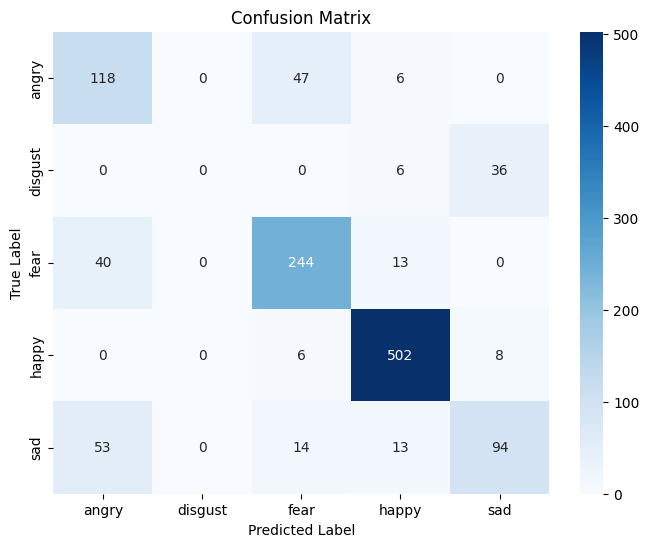

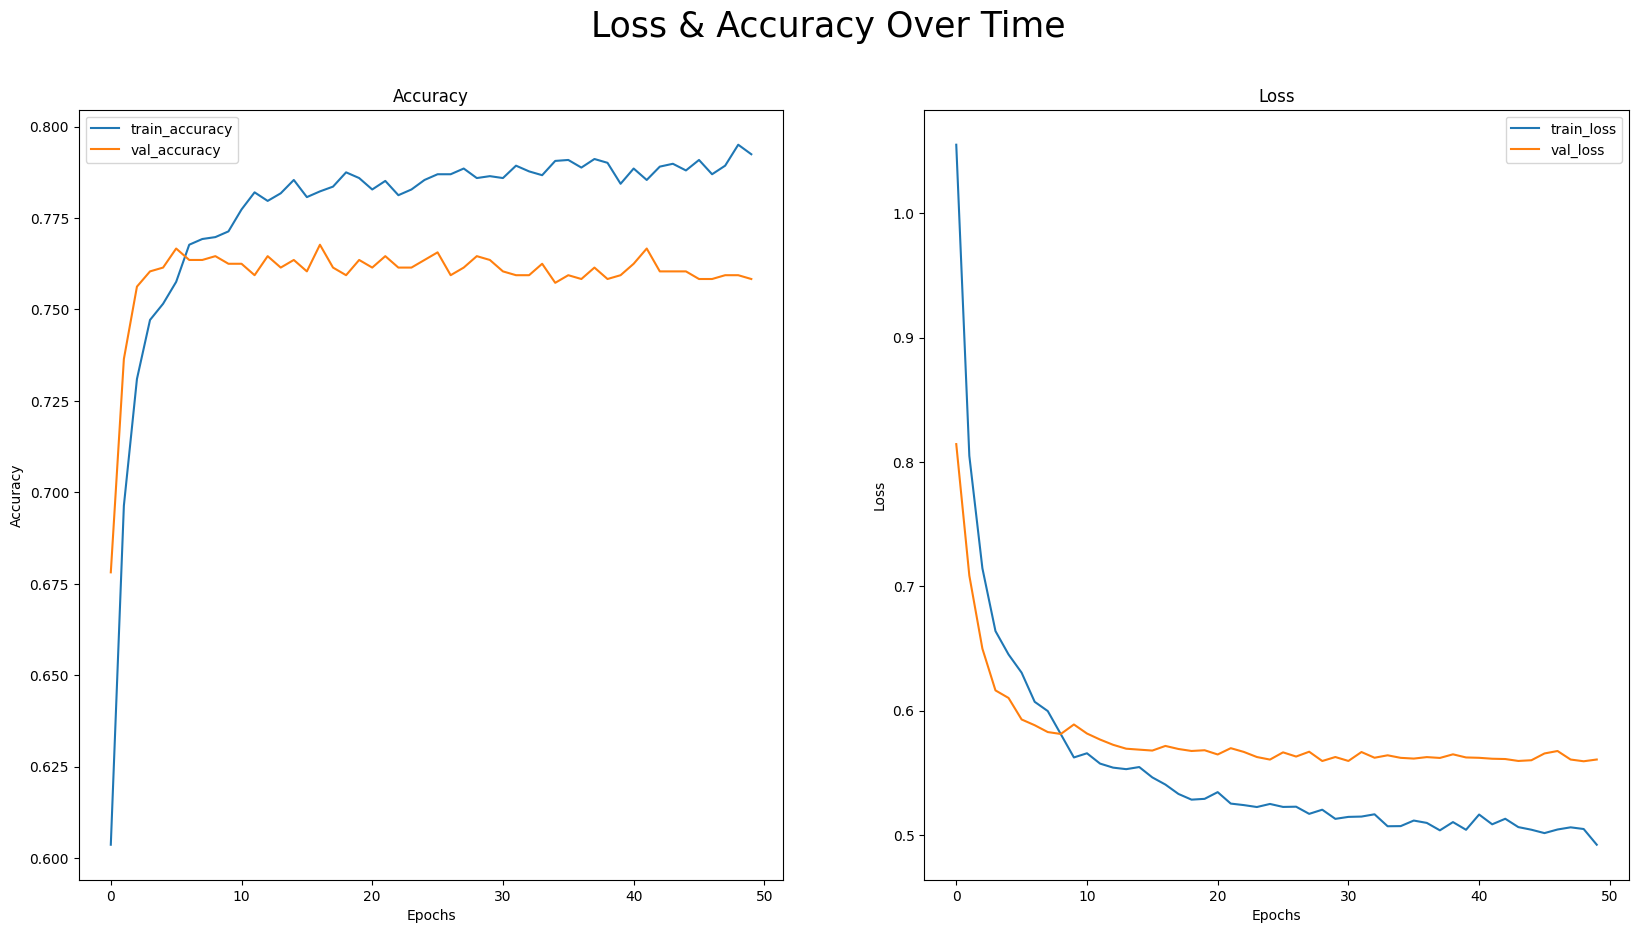

In [14]:
from tensorflow.keras.utils import plot_model  # Import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap

# Supongamos que ya tienes X e y preprocesados
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential([
    Dense(64, input_shape=(X.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')  # Capa de salida con softmax para clasificación multiclase
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Guardar el modelo en formato .h5
model.save('/content/drive/MyDrive/modelo_sensores.h5')
print("Modelo_sensores.h5 guardado")

# Visualizar la arquitectura del modelo y guardarla en .png
plot_model(model, to_file="arquitectura_modelo.png", show_shapes=True, show_layer_names=True)
print("Arquitectura del modelo guardada como arquitectura_modelo.png")

# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Métricas de clasificación
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))

# Visualizar la matriz de confusión con heatmap y etiquetas
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualización de curvas de entrenamiento

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
#plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.savefig('/content/drive/MyDrive/IA_ProyectoAgosto/Texto y Sensores/accsensores', format='pdf')
plt.show()


In [15]:
# Evaluación del modelo para obtener loss y accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Mostrar reporte de clasificación
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


Test Loss: 0.5202
Test Accuracy: 0.7983
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

       angry       0.56      0.69      0.62       171
     disgust       0.00      0.00      0.00        42
        fear       0.78      0.82      0.80       297
       happy       0.93      0.97      0.95       516
         sad       0.68      0.54      0.60       174

    accuracy                           0.80      1200
   macro avg       0.59      0.60      0.59      1200
weighted avg       0.77      0.80      0.78      1200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5035 - loss: 1.2820 - val_accuracy: 0.6427 - val_loss: 0.8645
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6663 - loss: 0.8807 - val_accuracy: 0.6625 - val_loss: 0.8363
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6820 - loss: 0.8391 - val_accuracy: 0.6583 - val_loss: 0.8208
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.8247 - val_accuracy: 0.6687 - val_loss: 0.8175
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6892 - loss: 0.8158 - val_accuracy: 0.6656 - val_loss: 0.8173
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6987 - loss: 0.8083 - val_accuracy: 0.6708 - val_loss: 0.8160
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6912 - loss: 0.8235 - val_accuracy: 0.6677 - val_loss: 0.8092
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7080 - loss: 0.7757 - val_accuracy: 0.6740

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


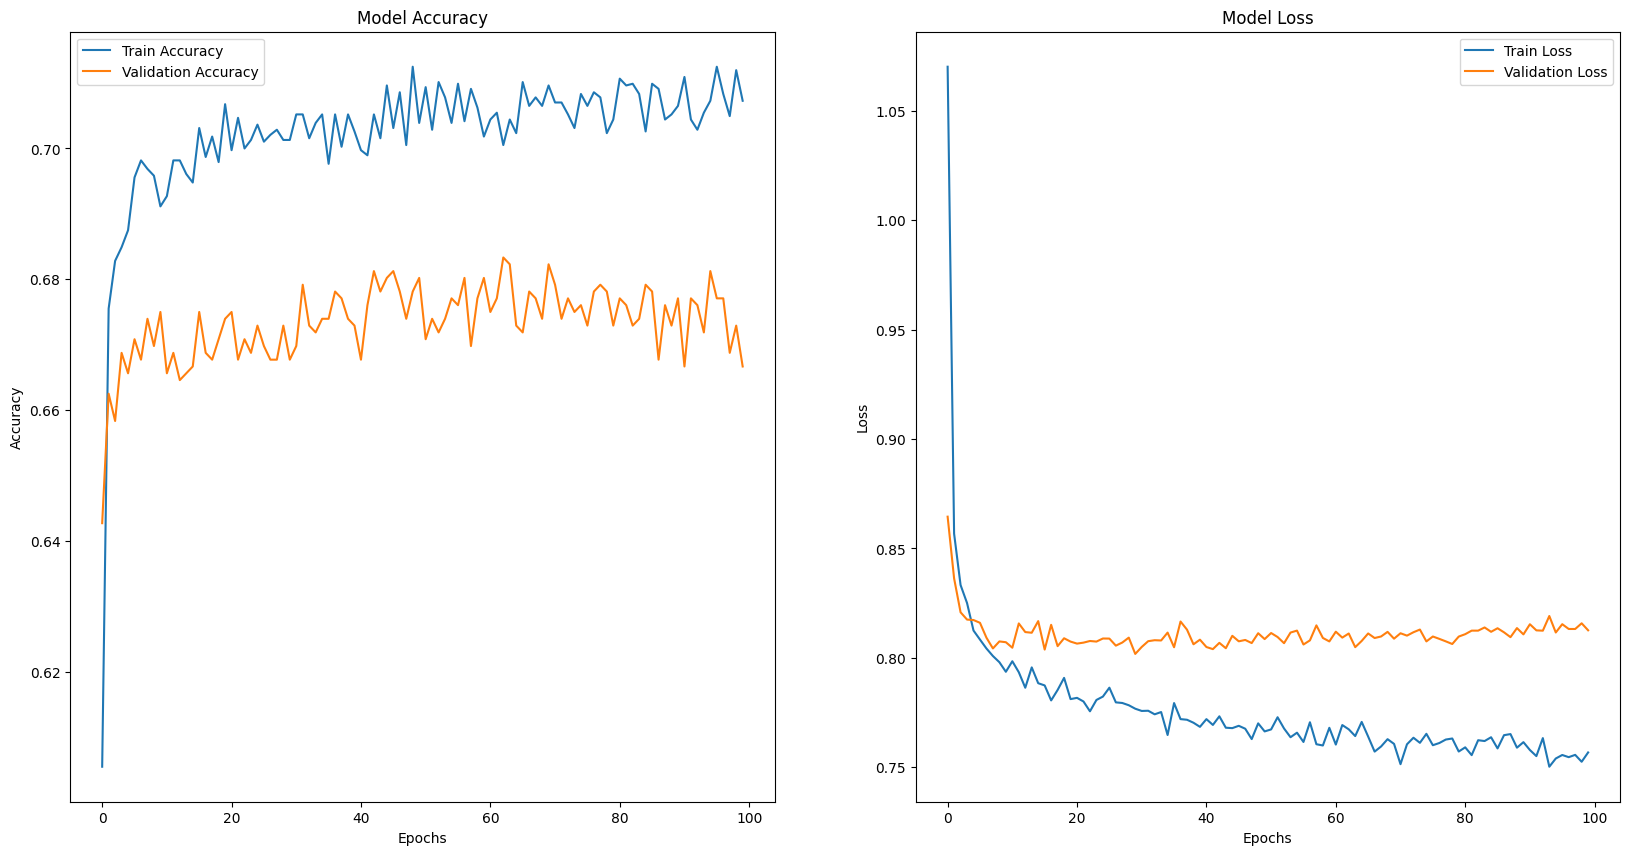

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Cargar y preprocesar datos
data = pd.read_csv('/content/drive/MyDrive/dataset_sensores_emociones.csv')

# Codificar las etiquetas de emociones
label_encoder = LabelEncoder()
data['Emoción'] = label_encoder.fit_transform(data['Emoción'])
y = to_categorical(data['Emoción'])  # One-hot encoding para clasificación

# Seleccionar características y normalizar
X = data[['Presión_Arterial', 'Pulso_Cardiaco', 'Sudoración']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir un modelo más complejo con varias capas ocultas
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])

# Compilar el modelo
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluación del modelo
test_loss, test_accuracy = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generar el reporte de clasificación
y_pred = model_2.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Visualización de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.savefig('/content/drive/MyDrive/IA_ProyectoAgosto/Texto y Sensores/accsensores2', format='pdf')
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


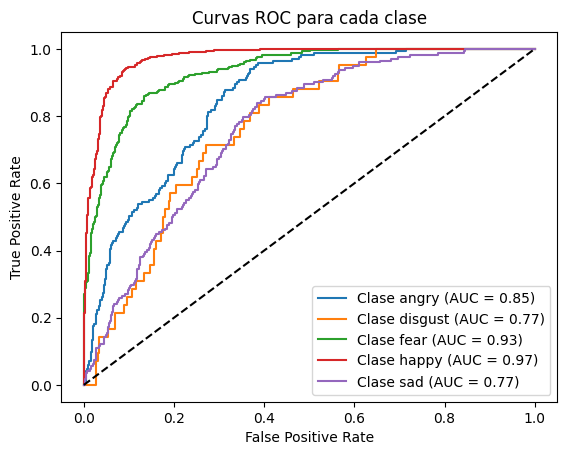

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Binarización de las etiquetas para calcular la curva ROC
y_test_binarized = label_binarize(y_test.argmax(axis=1), classes=range(y.shape[1]))
y_pred_binarized = model_2.predict(X_test)

# Graficar la Curva ROC y calcular el AUC para cada clase
plt.figure()
for i in range(y.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para cada clase')
plt.legend(loc="lower right")
plt.show()


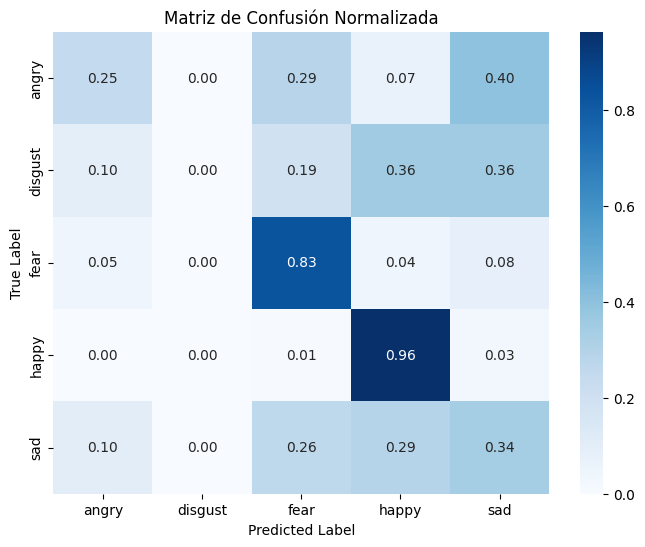

In [18]:
# Asegúrate de que y_pred y y_true tengan el mismo formato
y_pred = np.argmax(y_pred, axis=1)  # Convierte las predicciones continuas a etiquetas de clase
y_true = np.argmax(y_test, axis=1)  # Si y_test está en formato one-hot, conviértelo también

# Ahora, calcula la matriz de confusión normalizada
conf_matrix_norm = confusion_matrix(y_true, y_pred, normalize='true')

# Visualiza la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusión Normalizada")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
